# Import data

In [ ]:
import pandas as pd
df = pd.read_csv('customer_data2.csv')

In [712]:
df.head()

,Name,Age,Gender,Date of Birth,Location,Current Savings,Debt Amount,Job Type,Education Level,Number of Logins,Satisfaction Rating,Product Usage,Social Media Usage,ISA at 18
0,Laurie Navarro,17,Male,21/10/2005,NaN,53.0,3744.0,Full-time,Apprenticeships,27,2.0,Frequent,Frequent,All withdrawn
1,Amanda Russell,16,Male,11/08/2005,London,961.0,3921.0,Part-time,Apprenticeships,25,1.0,Occasional,Frequent,All withdrawn
2,Mark Bell,16,Male,21/07/2006,NaN,571.0,867.0,Student,GCSEs,30,2.0,Rare,Frequent,All withdrawn
3,Cheryl Cochran,16,Female,15/11/2005,NaN,229.0,4036.0,Unemployed,BTECs,33,1.0,Rare,Frequent,All withdrawn
4,Christopher Walsh,16,Female,23/02/2007,NaN,233.0,4570.0,Part-time,GCSEs,47,3.0,Rare,Frequent,All withdrawn


# Data Analysis

In [713]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 10000 non-null  object 
 1   Age                  10000 non-null  int64  
 2   Gender               10000 non-null  object 
 3   Date of Birth        10000 non-null  object 
 4   Location             105 non-null    object 
 5   Current Savings      9992 non-null   float64
 6   Debt Amount          9992 non-null   float64
 7   Job Type             9776 non-null   object 
 8   Education Level      9988 non-null   object 
 9   Number of Logins     10000 non-null  int64  
 10  Satisfaction Rating  9985 non-null   float64
 11  Product Usage        10000 non-null  object 
 12  Social Media Usage   9976 non-null   object 
 13  ISA at 18            9972 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [714]:
df.describe()

,Age,Current Savings,Debt Amount,Number of Logins,Satisfaction Rating
count,10000.000000,9992.000000,9992.000000,10000.000000,9985.000000
mean,16.490400,896.095076,2253.381505,29.674900,2.291137
std,0.499933,925.794958,1369.631094,13.288245,1.073830
min,16.000000,0.000000,0.000000,0.000000,1.000000
25%,16.000000,322.000000,1077.750000,22.000000,1.000000
50%,16.000000,646.000000,2050.000000,31.000000,2.000000
75%,17.000000,962.000000,3397.000000,40.000000,3.000000
max,17.000000,4994.000000,5000.000000,50.000000,5.000000


In [715]:
print(df['Gender'].value_counts())  # get frequency counts for Gender column

Female    5011
Male      4989
Name: Gender, dtype: int64


In [716]:
print(df['Job Type'].value_counts())  # get frequency counts for Job Type column

Student       5211
Unemployed    1995
Full-time     1841
Part-time      729
Name: Job Type, dtype: int64


In [717]:
print(df['Education Level'].value_counts())  # get frequency counts for Education Level column

GCSEs                   2823
Other Qualifications    2071
BTECs                   2057
Apprenticeships         1970
A-Levels                1067
Name: Education Level, dtype: int64


In [718]:
print(df['Product Usage'].value_counts())  # get frequency counts for Product Usage column

Rare          4547
Occasional    3783
Frequent      1670
Name: Product Usage, dtype: int64


In [719]:
print(df['Social Media Usage'].value_counts())  # get frequency counts for Social Media Usage column

Frequent      8389
Occasional    1281
Rare           306
Name: Social Media Usage, dtype: int64


In [720]:
print(df['ISA at 18'].value_counts())  # get frequency counts for ISA at 18 column

All withdrawn         6974
Partial withdrawal    1978
Not withdrawn         1020
Name: ISA at 18, dtype: int64


In [721]:
print(df['Location'].value_counts())  # get frequency counts for ISA at 18 column

London                 2
Chichester             2
Maidstone              2
Canterbury             2
Sevenoaks              2
                      ..
Limerick               1
Waterford              1
Newcastle upon Tyne    1
Durham                 1
Ashford                1
Name: Location, Length: 83, dtype: int64


# Data Wrangling 

In [722]:
### clean missing data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 10000 non-null  object 
 1   Age                  10000 non-null  int64  
 2   Gender               10000 non-null  object 
 3   Date of Birth        10000 non-null  object 
 4   Location             105 non-null    object 
 5   Current Savings      9992 non-null   float64
 6   Debt Amount          9992 non-null   float64
 7   Job Type             9776 non-null   object 
 8   Education Level      9988 non-null   object 
 9   Number of Logins     10000 non-null  int64  
 10  Satisfaction Rating  9985 non-null   float64
 11  Product Usage        10000 non-null  object 
 12  Social Media Usage   9976 non-null   object 
 13  ISA at 18            9972 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


### Clean missing data 


In [723]:
# Current Savings: replace nulls with with mean
# Debt Amount: replace nulls with with mean
# Job Type: replace null value with mode
# Education Level: replace null values with mode
# Satisfaction Rating: replace null values with median
# Social Media Usage: replace null values with mode
# ISA at 18: Deleete rows with null values
# Product Usage: change data type to int
# Satisfaction: change data type to int
# Location: delete column

In [724]:
import numpy as np

# Drop the 'Location' column
df.drop(columns=['Location'], inplace=True)

# Replace nulls in 'Current Savings' with mean
df.dropna(subset=['Current Savings'], inplace=True)

# Replace nulls in 'Debt Amount' with mean
df.dropna(subset=['Debt Amount'], inplace=True)

# Replace nulls in 'Job Type' with mode
mode_job = df['Job Type'].mode()[0]
df['Job Type'].fillna(mode_job, inplace=True)

# Replace nulls in 'Education Level' with mode
mode_edu = df['Education Level'].mode()[0]
df['Education Level'].fillna(mode_edu, inplace=True)

# Replace nulls in 'Satisfaction Rating' with median
median_satisfaction = df['Satisfaction Rating'].median()
df['Satisfaction Rating'].fillna(median_satisfaction, inplace=True)

# Replace nulls in 'Social Media Usage' with mode
mode_social_media = df['Social Media Usage'].mode()[0]
df['Social Media Usage'].fillna(mode_social_media, inplace=True)

# Delete rows with null values in 'ISA at 18' column
df.dropna(subset=['ISA at 18'], inplace=True)

# Change data type of 'Product Usage' column to int
df['Product Usage'] = df['Product Usage'].astype('category').cat.codes

# Change data type of 'Satisfaction Rating' column to int
df['Satisfaction Rating'] = df['Satisfaction Rating'].astype(int)


In [725]:
# Define a dictionary to map the categorical values to numerical values
isa_mapping = {
    'Partial withdrawal': 1,
    'Not withdrawn': 2,
    'All withdrawn': 3
}

# Convert the ISA at 18 column to numerical values using the mapping
df['ISA at 18 value'] = df['ISA at 18'].map(isa_mapping)

In [726]:
df.head()


,Name,Age,Gender,Date of Birth,Current Savings,Debt Amount,Job Type,Education Level,Number of Logins,Satisfaction Rating,Product Usage,Social Media Usage,ISA at 18,ISA at 18 value
0,Laurie Navarro,17,Male,21/10/2005,53.0,3744.0,Full-time,Apprenticeships,27,2,0,Frequent,All withdrawn,3
1,Amanda Russell,16,Male,11/08/2005,961.0,3921.0,Part-time,Apprenticeships,25,1,1,Frequent,All withdrawn,3
2,Mark Bell,16,Male,21/07/2006,571.0,867.0,Student,GCSEs,30,2,2,Frequent,All withdrawn,3
3,Cheryl Cochran,16,Female,15/11/2005,229.0,4036.0,Unemployed,BTECs,33,1,2,Frequent,All withdrawn,3
4,Christopher Walsh,16,Female,23/02/2007,233.0,4570.0,Part-time,GCSEs,47,3,2,Frequent,All withdrawn,3


In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 9964 non-null   object 
 1   Age                  9964 non-null   int64  
 2   Gender               9964 non-null   object 
 3   Date of Birth        9964 non-null   object 
 4   Current Savings      9964 non-null   float64
 5   Debt Amount          9964 non-null   float64
 6   Job Type             9964 non-null   object 
 7   Education Level      9964 non-null   object 
 8   Number of Logins     9964 non-null   int64  
 9   Satisfaction Rating  9964 non-null   int64  
 10  Product Usage        9964 non-null   int8   
 11  Social Media Usage   9964 non-null   object 
 12  ISA at 18            9964 non-null   object 
 13  ISA at 18 value      9964 non-null   int64  
dtypes: float64(2), int64(4), int8(1), object(7)
memory usage: 1.1+ MB


In [728]:
df.shape

(9964, 14)

In [729]:
df.head()

,Name,Age,Gender,Date of Birth,Current Savings,Debt Amount,Job Type,Education Level,Number of Logins,Satisfaction Rating,Product Usage,Social Media Usage,ISA at 18,ISA at 18 value
0,Laurie Navarro,17,Male,21/10/2005,53.0,3744.0,Full-time,Apprenticeships,27,2,0,Frequent,All withdrawn,3
1,Amanda Russell,16,Male,11/08/2005,961.0,3921.0,Part-time,Apprenticeships,25,1,1,Frequent,All withdrawn,3
2,Mark Bell,16,Male,21/07/2006,571.0,867.0,Student,GCSEs,30,2,2,Frequent,All withdrawn,3
3,Cheryl Cochran,16,Female,15/11/2005,229.0,4036.0,Unemployed,BTECs,33,1,2,Frequent,All withdrawn,3
4,Christopher Walsh,16,Female,23/02/2007,233.0,4570.0,Part-time,GCSEs,47,3,2,Frequent,All withdrawn,3


In [741]:
df.to_excel('customer_data_tableau.xlsx', index=True)

# Data Viz

In [731]:
import matplotlib.pyplot as plt
import seaborn as sns

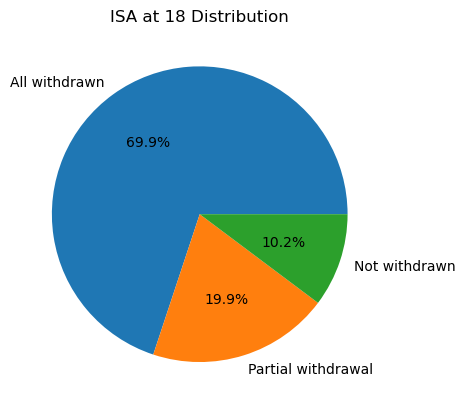

In [732]:
# Get the counts of ISA at 18 values
isa_counts = df['ISA at 18'].value_counts()

# Create a pie chart
plt.pie(isa_counts, labels=isa_counts.index, autopct='%1.1f%%')
plt.title('ISA at 18 Distribution')

# Show the plot
plt.show()

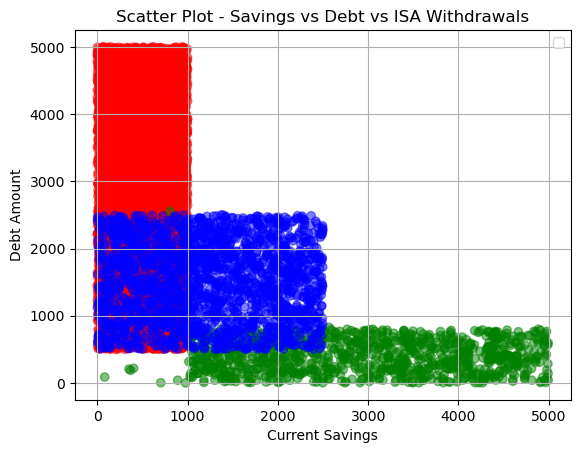

In [734]:
# Data
x = df['Current Savings']
y = df['Debt Amount']
colors = df['ISA at 18'].map({'All withdrawn': 'red', 'Partial withdrawal': 'blue', 'Not withdrawn': 'green'})

# Plot
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, c=colors)

# Customize plot
plt.xlabel('Current Savings')
plt.ylabel('Debt Amount')
plt.title('Scatter Plot - Savings vs Debt vs ISA Withdrawals')
plt.grid(True)

# Add legend
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
plt.legend(unique_handles, unique_labels)

plt.show()

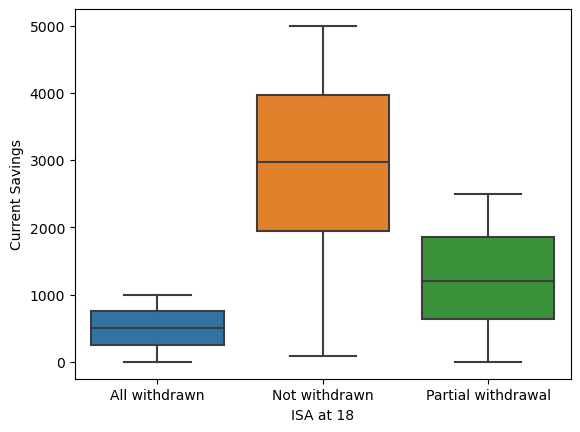

In [735]:
sns.boxplot(x='ISA at 18', y='Current Savings', data=df)
plt.show()

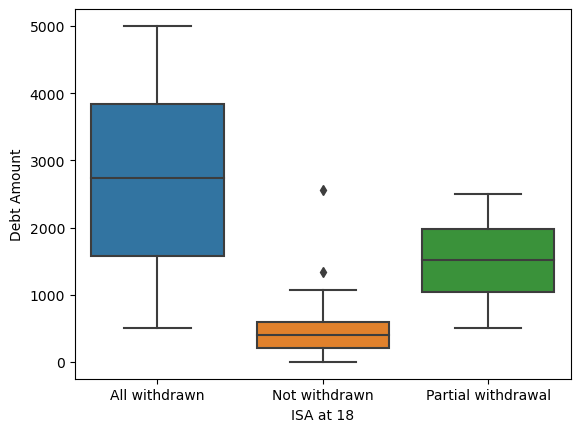

In [736]:
sns.boxplot(x='ISA at 18', y='Debt Amount', data=df)
plt.show()

# Data Viz 2

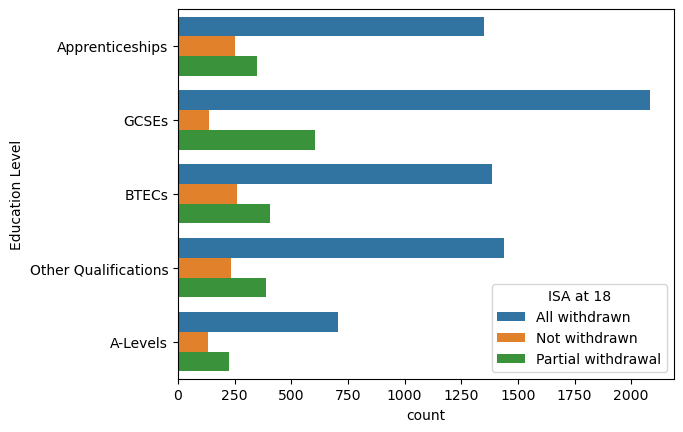

In [738]:
sns.countplot(y='Education Level', hue='ISA at 18', data=df, orient='h')
plt.show()

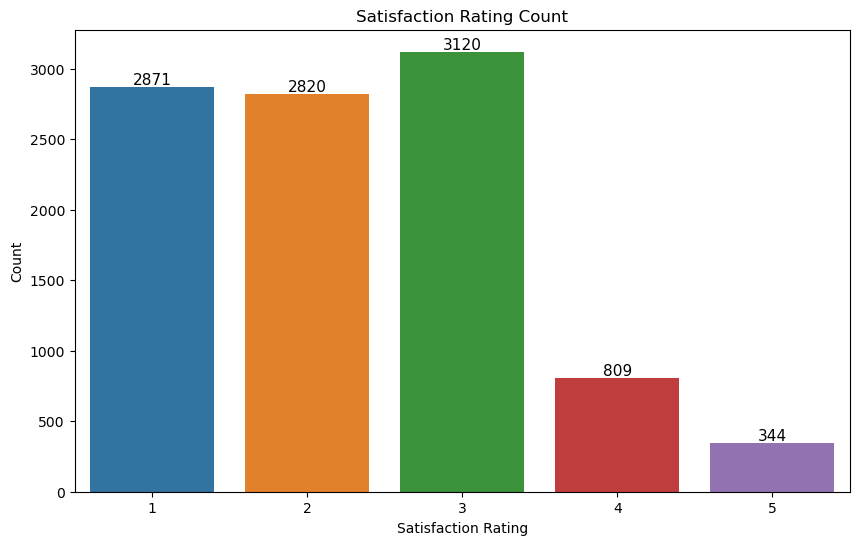

In [742]:
# Set the figure size for all plots
plt.figure(figsize=(10, 6))

# Bar plot of Education Level
ax = sns.countplot(x='Satisfaction Rating', data=df)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the x and y axis labels and the plot title
ax.set_xlabel('Satisfaction Rating')
ax.set_ylabel('Count')
ax.set_title('Satisfaction Rating Count')

# Show the plot
plt.show()


# Machine Learning - TBC

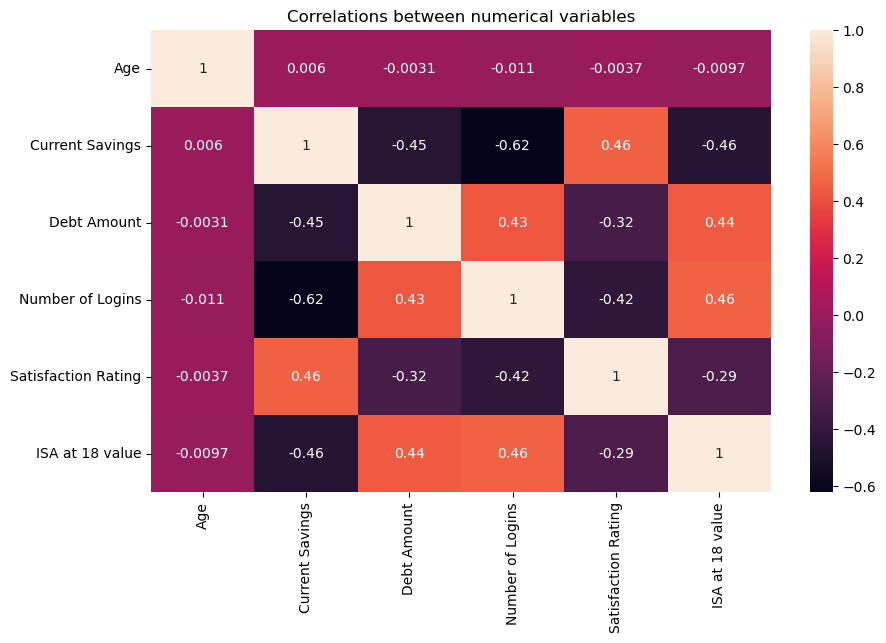

In [737]:
# Set the figure size for all plots
plt.figure(figsize=(10, 6))


# Heatmap of correlations between numerical variables
corr = df[['Age', 'Current Savings', 'Debt Amount', 'Number of Logins', 'Satisfaction Rating', 'ISA at 18 value']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlations between numerical variables')

plt.show()


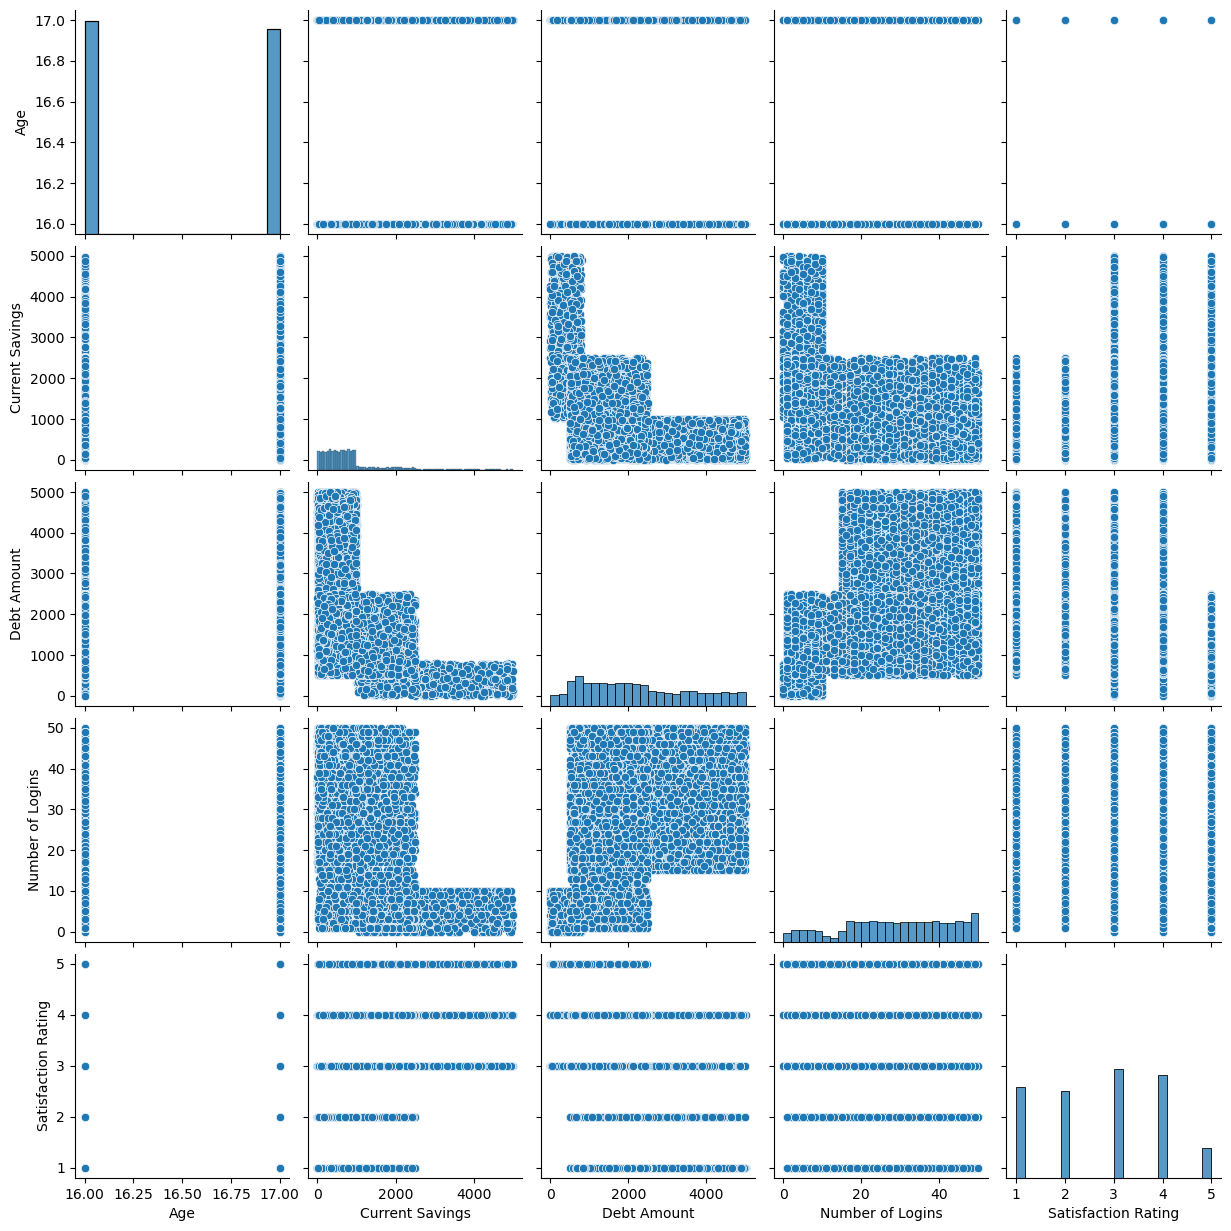

In [740]:
sns.pairplot(customer_data2.select_dtypes(include=['int64', 'float64']))
plt.show()

# TBC